<a href="https://colab.research.google.com/github/IrfanKpm/machine-learning-diaries/blob/main/TensorFlow/_005_image_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image, ImageOps, ImageEnhance, ImageChops

In [22]:
# Load an image using PIL
image_path = '/content/dog-8198719_640.webp'  # Replace with your image path

# Load the image using PIL
image_pil = Image.open(image_path)
image_pil = image_pil.resize((256, 256))  # Resize for consistency

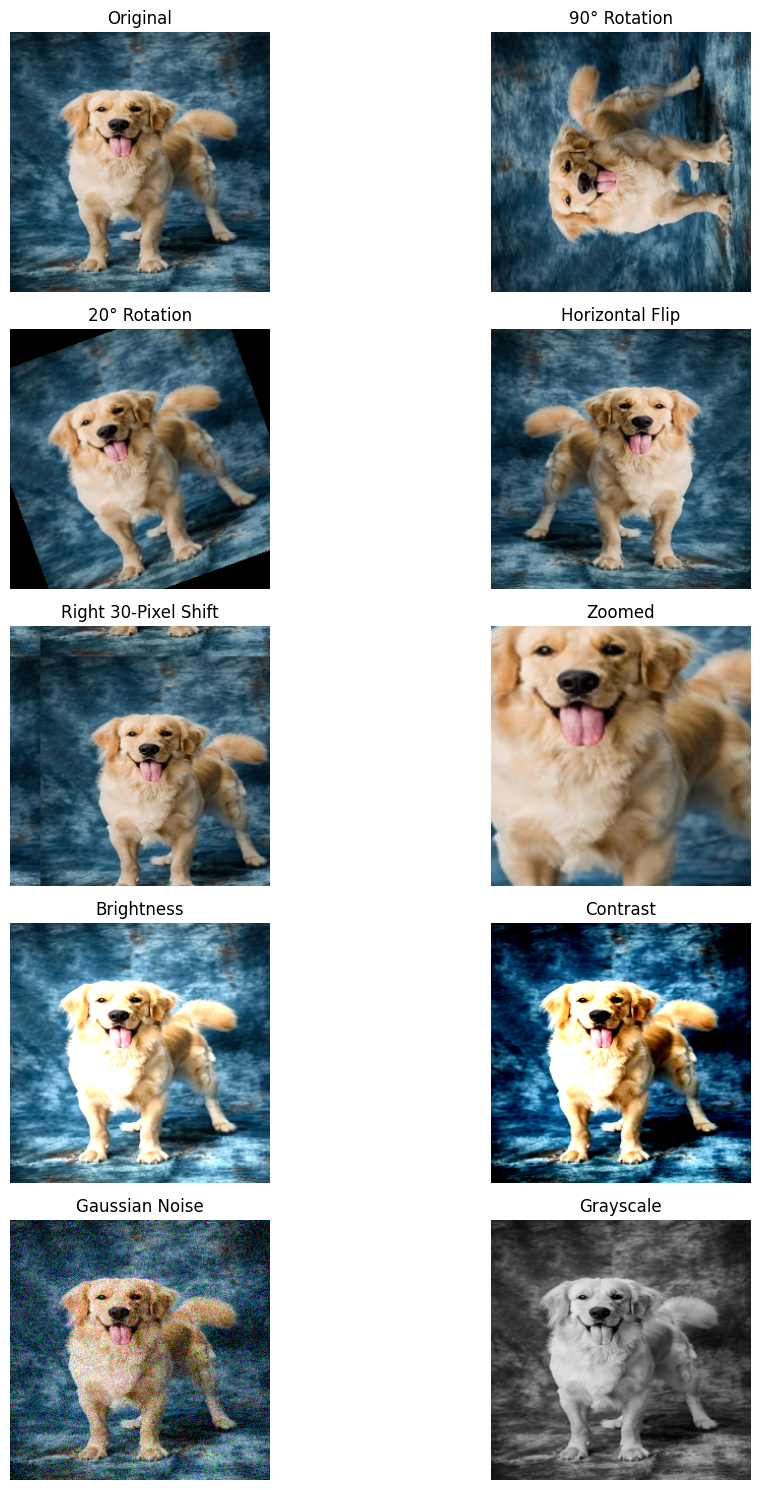

In [21]:
# Function to rotate the image using PIL
def rotate_image_pil(image, degrees):
    return image.rotate(degrees, resample=Image.BILINEAR)

# Function to shift the image right by 30 pixels using PIL
def shift_image_right_pil(image, shift_pixels):
    return ImageChops.offset(image, xoffset=shift_pixels)

# Convert PIL image to TensorFlow tensor
def pil_to_tensor(image):
    return tf.convert_to_tensor(np.array(image))

# Apply augmentations
augmented_images = []

# Original image (for reference)
augmented_images.append(image_pil)

# 90-degree rotation
rotated_image_90 = rotate_image_pil(image_pil, 90)
augmented_images.append(rotated_image_90)

# 20-degree rotation
rotated_image_20 = rotate_image_pil(image_pil, 20)
augmented_images.append(rotated_image_20)

# Flip horizontally
flipped_image = ImageOps.mirror(image_pil)
augmented_images.append(flipped_image)

# Right 30-pixel shift
shifted_image = shift_image_right_pil(image_pil, 30)
augmented_images.append(shifted_image)

# Zoom (by cropping and resizing back)
zoomed_image = image_pil.crop((64, 64, 192, 192)).resize((256, 256))
augmented_images.append(zoomed_image)

# Brightness adjustment
brightness_enhancer = ImageEnhance.Brightness(image_pil)
brightness_image = brightness_enhancer.enhance(1.5)  # Increase brightness by 50%
augmented_images.append(brightness_image)

# Contrast adjustment
contrast_enhancer = ImageEnhance.Contrast(image_pil)
contrast_image = contrast_enhancer.enhance(2.0)  # Increase contrast by 100%
augmented_images.append(contrast_image)

# Gaussian noise
def add_gaussian_noise(image, mean=0, stddev=25):
    noise = np.random.normal(mean, stddev, (256, 256, 3))
    noisy_image = np.array(image) + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy_image)

noisy_image = add_gaussian_noise(image_pil)
augmented_images.append(noisy_image)

# Grayscale conversion
grayscale_image = ImageOps.grayscale(image_pil).convert("RGB")
augmented_images.append(grayscale_image)

# Display the images using Matplotlib
fig, axs = plt.subplots(5, 2, figsize=(12, 15))
axs = axs.flatten()

# Define titles for each subplot
titles = [
    'Original', '90° Rotation', '20° Rotation', 'Horizontal Flip',
    'Right 30-Pixel Shift', 'Zoomed', 'Brightness', 'Contrast',
    'Gaussian Noise', 'Grayscale'
]

# Plot each image in the subplot
for i, (img, title) in enumerate(zip(augmented_images, titles)):
    axs[i].imshow(np.array(img))
    axs[i].set_title(title)
    axs[i].axis('off')

plt.tight_layout()
plt.show()
